In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow  as tf
from keras.models import Sequential
from keras.layers import Dense

In [2]:
ds=pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\gas_turbines.csv")
ds

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
ds=ds.head(5400)
ds

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
5395,17.4210,1016.1,69.156,4.1775,25.017,1088.8,549.82,133.74,12.008,1.1013,69.715
5396,18.4750,1016.3,63.653,4.2192,25.146,1089.4,549.91,133.76,12.033,2.3108,74.048
5397,19.5390,1016.0,60.512,4.2717,25.282,1090.2,550.02,133.77,11.977,1.8847,72.765
5398,20.5950,1015.6,59.064,3.8440,21.824,1069.8,549.94,118.73,11.132,3.5281,68.106


In [4]:
ds.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.321706,-0.539120,-0.354036,-0.089780,0.168821,0.502056,-0.220613,-0.116848,-0.083544,-0.582296
AP,-0.321706,1.000000,0.005757,0.024650,0.082380,0.003347,-0.233291,0.119755,0.115565,0.016355,0.185534
AH,-0.539120,0.005757,1.000000,0.050712,-0.185597,-0.279199,-0.074346,-0.102657,-0.173959,0.195912,0.087479
AFDP,-0.354036,0.024650,0.050712,1.000000,0.815342,0.622380,-0.693576,0.829587,0.807504,-0.438783,0.111504
GTEP,-0.089780,0.082380,-0.185597,0.815342,1.000000,0.866418,-0.699059,0.981051,0.994853,-0.536959,-0.128837
TIT,0.168821,0.003347,-0.279199,0.622380,0.866418,1.000000,-0.256309,0.873051,0.882770,-0.696459,-0.202814
TAT,0.502056,-0.233291,-0.074346,-0.693576,-0.699059,-0.256309,1.000000,-0.675063,-0.677094,0.043397,-0.113458
TEY,-0.220613,0.119755,-0.102657,0.829587,0.981051,0.873051,-0.675063,1.000000,0.989211,-0.565148,-0.034337
CDP,-0.116848,0.115565,-0.173959,0.807504,0.994853,0.882770,-0.677094,0.989211,1.000000,-0.549078,-0.096652
CO,-0.083544,0.016355,0.195912,-0.438783,-0.536959,-0.696459,0.043397,-0.565148,-0.549078,1.000000,0.224204


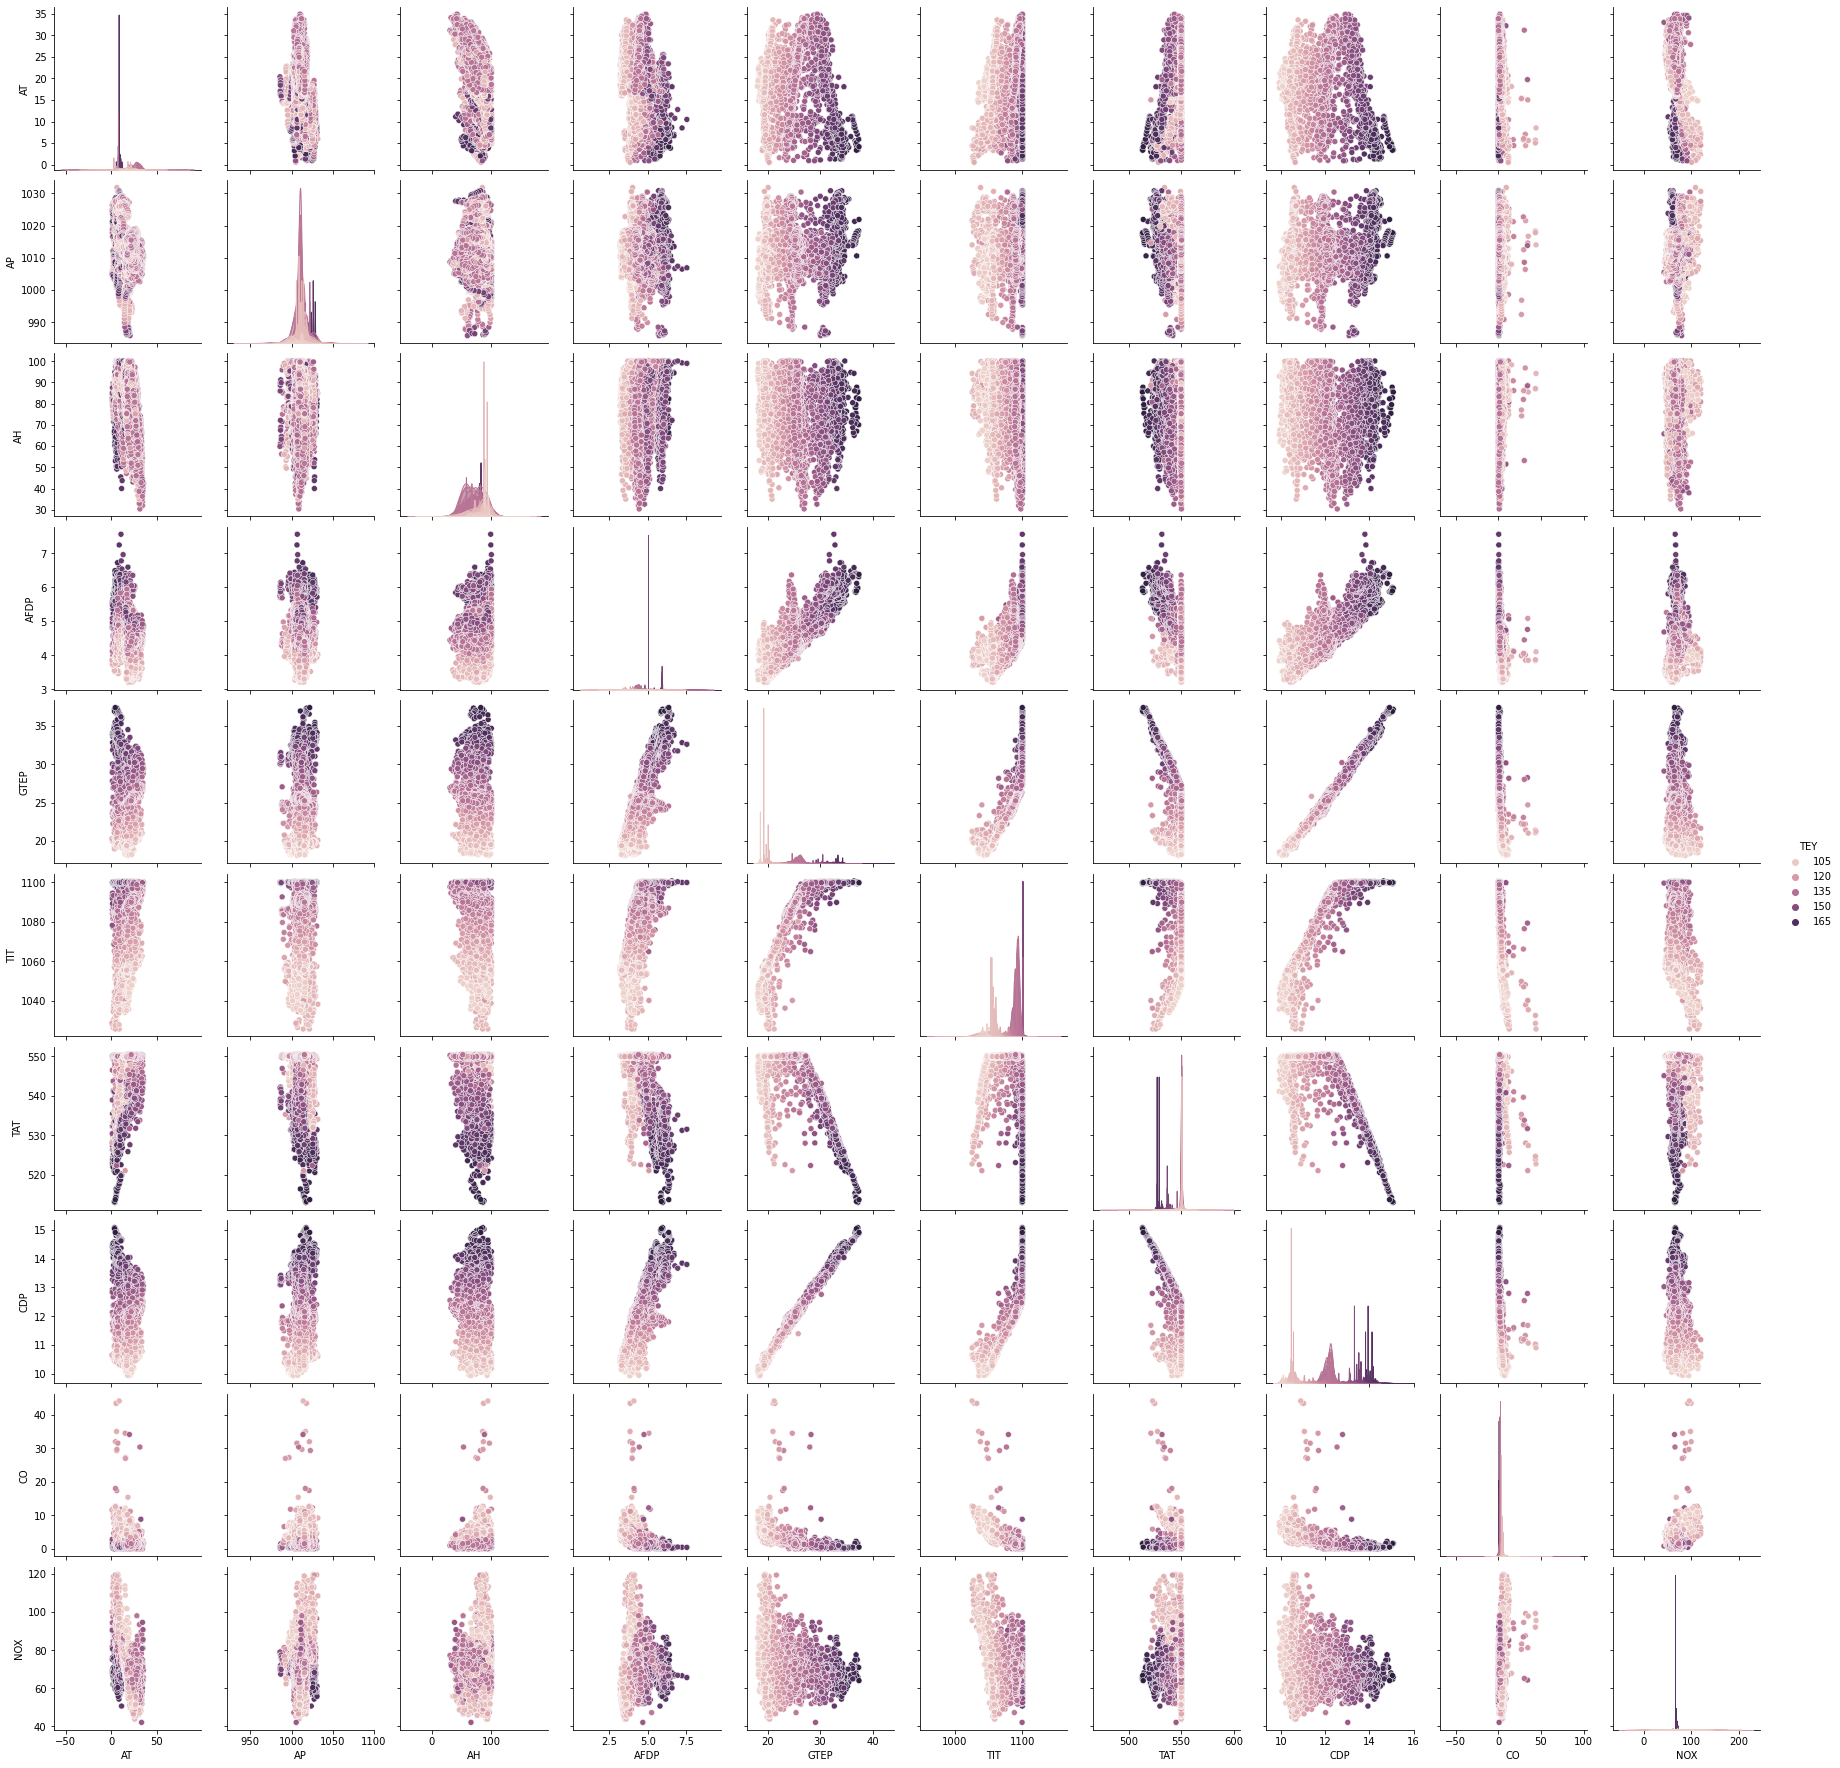

In [5]:
import seaborn as sns
sns.pairplot(ds, hue='TEY')

In [6]:
ds

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
5395,17.4210,1016.1,69.156,4.1775,25.017,1088.8,549.82,133.74,12.008,1.1013,69.715
5396,18.4750,1016.3,63.653,4.2192,25.146,1089.4,549.91,133.76,12.033,2.3108,74.048
5397,19.5390,1016.0,60.512,4.2717,25.282,1090.2,550.02,133.77,11.977,1.8847,72.765
5398,20.5950,1015.6,59.064,3.8440,21.824,1069.8,549.94,118.73,11.132,3.5281,68.106


In [9]:
ds1=ds.drop(['AT','AP','AH','AFDP','GTEP',
                      'TAT','CO','NOX'],axis=1)
ds1

,TIT,TEY,CDP
0,1059.2,114.70,10.605
1,1059.3,114.72,10.598
2,1059.4,114.71,10.601
3,1059.6,114.72,10.606
4,1059.7,114.72,10.612
...,...,...,...
5395,1088.8,133.74,12.008
5396,1089.4,133.76,12.033
5397,1090.2,133.77,11.977
5398,1069.8,118.73,11.132


In [10]:
ds3=ds1.values
ds3

array([[1059.2  ,  114.7  ,   10.605],
       [1059.3  ,  114.72 ,   10.598],
       [1059.4  ,  114.71 ,   10.601],
       ...,
       [1090.2  ,  133.77 ,   11.977],
       [1069.8  ,  118.73 ,   11.132],
       [1090.   ,  133.5  ,   12.154]])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [12]:
scaler=preprocessing.StandardScaler()
ds4=scaler.fit_transform(ds3)
ds4

array([[-1.41990787, -1.17854708, -1.34279333],
       [-1.41404897, -1.17726403, -1.34931324],
       [-1.40819007, -1.17790555, -1.346519  ],
       ...,
       [ 0.39635139,  0.04484783, -0.06489065],
       [-0.79886438, -0.92001108, -0.85193713],
       [ 0.38463359,  0.02752656,  0.09996998]])

In [13]:
ds5=pd.DataFrame(ds4)
ds5

,0,1,2
0,-1.419908,-1.178547,-1.342793
1,-1.414049,-1.177264,-1.349313
2,-1.408190,-1.177906,-1.346519
3,-1.396472,-1.177264,-1.341862
4,-1.390613,-1.177264,-1.336273
...,...,...,...
5395,0.314327,0.042923,-0.036017
5396,0.349480,0.044206,-0.012731
5397,0.396351,0.044848,-0.064891
5398,-0.798864,-0.920011,-0.851937


In [17]:
x=ds4[:,[2,2]]
x

array([[-1.34279333, -1.34279333],
       [-1.34931324, -1.34931324],
       [-1.346519  , -1.346519  ],
       ...,
       [-0.06489065, -0.06489065],
       [-0.85193713, -0.85193713],
       [ 0.09996998,  0.09996998]])

In [18]:
x.shape

(5400, 2)

In [20]:
y=ds4[:,1]
y

array([-1.17854708, -1.17726403, -1.17790555, ...,  0.04484783,
       -0.92001108,  0.02752656])

In [21]:
y.shape

(5400,)

In [22]:
model=Sequential()
model.add(Dense(10,input_dim=2,kernel_initializer='uniform',activation='linear'))
model.add(Dense(5,kernel_initializer='uniform',activation='linear'))
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam')
history=model.fit(x,y,validation_split=0.33,epochs=200,batch_size=15)

Epoch 1/200
242/242 [==============================] - 5s 4ms/step - loss: 0.7827 - val_loss: 0.5111
Epoch 2/200
242/242 [==============================] - 1s 4ms/step - loss: 0.4918 - val_loss: 0.4779
Epoch 3/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4898 - val_loss: 0.4745
Epoch 4/200
242/242 [==============================] - 1s 4ms/step - loss: 0.4898 - val_loss: 0.4739
Epoch 5/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4898 - val_loss: 0.4748
Epoch 6/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4898 - val_loss: 0.4748
Epoch 7/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4898 - val_loss: 0.4757
Epoch 8/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.4753
Epoch 9/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.4746
Epoch 10/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_lo

242/242 [==============================] - 1s 3ms/step - loss: 0.4900 - val_loss: 0.4753
Epoch 82/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.4753
Epoch 83/200
242/242 [==============================] - 1s 2ms/step - loss: 0.4899 - val_loss: 0.4733
Epoch 84/200
242/242 [==============================] - 1s 2ms/step - loss: 0.4898 - val_loss: 0.4733
Epoch 85/200
242/242 [==============================] - 1s 2ms/step - loss: 0.4899 - val_loss: 0.4739
Epoch 86/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4901 - val_loss: 0.4752
Epoch 87/200
242/242 [==============================] - 1s 2ms/step - loss: 0.4899 - val_loss: 0.4755
Epoch 88/200
242/242 [==============================] - 1s 2ms/step - loss: 0.4898 - val_loss: 0.4725
Epoch 89/200
242/242 [==============================] - 1s 2ms/step - loss: 0.4898 - val_loss: 0.4725
Epoch 90/200
242/242 [==============================] - 1s 2ms/step - loss: 0.4898 - val_loss: 

Epoch 161/200
242/242 [==============================] - 1s 2ms/step - loss: 0.4899 - val_loss: 0.4750
Epoch 162/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4898 - val_loss: 0.4745
Epoch 163/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.4734
Epoch 164/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.4743
Epoch 165/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4898 - val_loss: 0.4739
Epoch 166/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.4746
Epoch 167/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4898 - val_loss: 0.4746
Epoch 168/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4899 - val_loss: 0.4736
Epoch 169/200
242/242 [==============================] - 1s 3ms/step - loss: 0.4900 - val_loss: 0.4750
Epoch 170/200
242/242 [==============================] - 1s 3ms/step - lo

In [24]:
scores=model.evaluate(x,y)
print(scores)

169/169 [==============================] - 0s 2ms/step - loss: 0.4848
0.48480454087257385


In [25]:
model.history.history.keys()

dict_keys([])

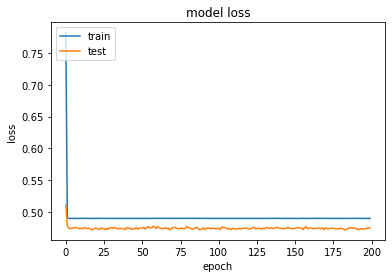

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()